In [87]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from math import e, log
import pandas as pd
from sklearn import datasets
import seaborn as sns
from scipy.stats import norm 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages 

In [88]:
size_of_sample = 2000
max_l = 200
H = np.array([
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0], 
    [0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 
    [1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
    [1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
    [0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
])

In [89]:
def dc_update(L_j_i):
    L_i_j = [[0 for i in range(10)] for j in range(5)]
    for i in range(len(L_i_j)):
        for j in range(len(L_i_j[0])):
            tmp = 1
            for k in range(len(L_i_j[0])):
                if (k != j):
                    if (H[i][k]):
                        tmp *= np.tanh(L_j_i[k][i] / 2)
            L_i_j[i][j] = 2 * np.arctanh(tmp)
    return L_i_j

In [90]:
def dv_update(L_i_j, L_j_i, L_j):
    for i in range(len(L_j_i)):
        for j in range(len(L_j_i[0])):
            tmp = L_j[i]
            for k in range(len(L_j_i[0])):
                if (k != j):
                    if (H[k][i]):
                        tmp += L_i_j[k][i]
            L_j_i[i][j] = tmp
    return L_j_i

In [91]:
def hist_update(L_j_i, l):
    L_j_i = np.array(L_j_i)
    if (abs(np.sum(L_j_i, axis = 1)) < float('inf')).all():
        if (l == 1):
            L_dist[0].append(np.sum(L_j_i, axis = 1))
        elif (l == 2):
            L_dist[1].append(np.sum(L_j_i, axis = 1))
        elif (l == 5):
            L_dist[2].append(np.sum(L_j_i, axis = 1))
        elif (l == 10):
            L_dist[3].append(np.sum(L_j_i, axis = 1))
        elif (l == 20):
            L_dist[4].append(np.sum(L_j_i, axis = 1))
        elif (l == 40):
            L_dist[5].append(np.sum(L_j_i, axis = 1))
        elif (l == 80):
            L_dist[6].append(np.sum(L_j_i, axis = 1))
        elif (l == 100):
            L_dist[7].append(np.sum(L_j_i, axis = 1))
        elif (l == 0):
            L_dist[8].append(np.sum(L_j_i, axis = 1))

In [92]:
def hist_update_2(L_i_j, l):
    L_i_j = np.array(L_i_j)
    if  (abs(np.sum(L_i_j, axis = 1)) < float('inf')).all():
        if (l == 1):
            L_dist_c[0].append(np.sum(L_i_j, axis = 1))
        elif (l == 2):
            L_dist_c[1].append(np.sum(L_i_j, axis = 1))
        elif (l == 5):
            L_dist_c[2].append(np.sum(L_i_j, axis = 1))
        elif (l == 10):
            L_dist_c[3].append(np.sum(L_i_j, axis = 1))
        elif (l == 20):
            L_dist_c[4].append(np.sum(L_i_j, axis = 1))
        elif (l == 40):
            L_dist_c[5].append(np.sum(L_i_j, axis = 1))
        elif (l == 80):
            L_dist_c[6].append(np.sum(L_i_j, axis = 1))
        elif (l == 100):
            L_dist_c[7].append(np.sum(L_i_j, axis = 1))
        

In [93]:
def stop_kriteria(L_j_i, L_i_j, L_j, H, l, trace, i):
    mv = np.zeros(10)
    for j in range(len(L_j_i)):
        tmp = 0
        for i in range(len(L_j_i[0])):
            if (H[i][j]):
                tmp += L_i_j[i][j]
        if (tmp + L_j[j] < 0):
            mv[j] = 1
        else:
            mv[j] = 0
    if (np.dot(mv, H.T).all() == 0):
        #print("got_it\n")
        #print(mv)
        #print(l)
        #return True
        if trace[i][0] == 0:
            trace[i][0] = 1
            trace[i][1] = 0
    else:
        if trace[i][0] == 1:
            trace[i][1] = 1
    if (l == max_l):
        #print("max_iter_reach")
        return True

In [94]:
def iteration_of_sample(sigma, i):
    l = 0
    L_j = np.random.normal(2/(sigma ** 2), 4 / (sigma ** 2), 2000)
    L_j_i = [[L_j[j] if H[i][j] == 1 else 0 for i in range(5)] for j in range(10)]
    L_i_j = [[0 for i in range(5)] for j in range(10)]
    hist_update_2(L_j_i, l)
    while True:
        L_i_j = dc_update(L_j_i)
        L_j_i = dv_update(L_i_j, L_j_i, L_j)
        l += 1
        hist_update(L_j_i, l)
        hist_update_2(L_i_j, l)
        if (stop_kriteria(L_j_i, L_i_j, L_j, H, l, trace, i)):
            break
    return l

Рассмотрим распределение на v и u для сигмы, находящейся в районе трешхолда, на 1, 2, 5, 10, 20, 40, 80 итерациях, пока только для первой вершины

In [95]:
sigma = 0.7
L_dist = [[] for j in range(9)]
L_dist_c = [[] for j in range(8)]
i = 0
trace = [[0, 0] for i in range(2000)]
while (i < size_of_sample):
    iteration_of_sample(sigma, i)
    i += 1

/var/folders/x6/b_ylqyd127s0ckfw_r19b2880000gn/T/ipykernel_56167/2049944553.py:10: RuntimeWarning: divide by zero encountered in arctanh
  L_i_j[i][j] = 2 * np.arctanh(tmp)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [96]:
def save_image(filename): 
    
    # PdfPages is a wrapper around pdf  
    # file so there is no clash and 
    # create files with no error. 
    p = PdfPages(filename) 
      
    # get_fignums Return list of existing 
    # figure numbers 
    fig_nums = plt.get_fignums()   
    figs = [plt.figure(n) for n in fig_nums] 
      
    # iterating over the numbers in list 
    for fig in figs:  
        
        # and saving the files 
        fig.savefig(p, format='pdf')  
          
    # close the object 
    p.close()  

(2000, 5)


<AxesSubplot: >

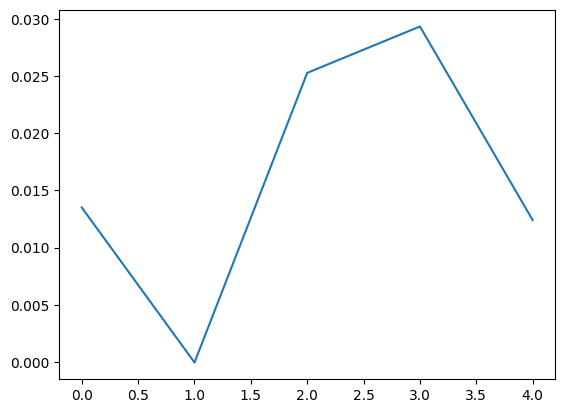

In [98]:
arr = np.array(L_dist_c[0])
print(arr.shape)
arr_to_plot = np.mean(arr, axis = 0) / np.std(arr, axis = 0)
sns.lineplot(arr_to_plot)

In [ ]:
arr = np.array(L_dist[0])
print(arr.shape)
arr_to_plot = np.mean(arr, axis = 0) / np.std(arr, axis = 0)
sns.lineplot(arr_to_plot)

In [63]:
for l in range(8):
    fig1 = plt.figure() 
    arr = np.array(L_dist[l])[:, 0]
    print(arr.shape)
    
    
    mu, std = norm.fit(arr)
    plt.hist(arr, bins= np.arange(arr.min(), arr.max() + 1, 1), density=True)
    xmin, xmax = plt.xlim() 
    x = np.linspace(xmin, xmax, 10000) 
    p = norm.pdf(x, mu, std) 
    plt.plot(x, p, 'k', linewidth=2)
    title = "sigma: {:.5f}; decoded: {:.2f}".format(sigma, arr.shape[0] / 2000) + " dv = 6, dc = 3 " + "VN"
    plt.title(title) 
    plt.plot()
    if (l == 0):
        filename = "VN_iteration1_sigma: {:.2f}.pdf".format(sigma)
    elif (l == 1):
        filename = "VN_iteration2_sigma: {:.2f}.pdf".format(sigma)
    elif (l == 2):
        filename = "VN_iteration5_sigma: {:.2f}.pdf".format(sigma)
    elif (l == 3):
        filename = "VN_iteration10_sigma: {:.2f}.pdf".format(sigma) 
    elif (l == 4):
        filename = "VN_iteration20_sigma: {:.2f}.pdf".format(sigma)  
    elif (l == 5):
        filename = "VN_iteration40_sigma: {:.2f}.pdf".format(sigma)  
    elif (l == 6):
        filename = "VN_iteration80_sigma: {:.2f}.pdf".format(sigma) 
    elif (l == 7):
        filename = "VN_iteration100_sigma: {:.2f}.pdf".format(sigma) 
    save_image(filename)  
    plt.close('all')

(2000,)
(2000,)
(2000,)
(1965,)
(1863,)
(1842,)
(1834,)
(1834,)


In [64]:
for l in range(8):
    fig2 = plt.figure()
    arr = np.array(L_dist_c[l])[:, 0]
    mu, std = norm.fit(arr)  
    plt.hist(arr, bins= np.arange(arr.min(), arr.max() + 0.1, 0.1), density=True)
    xmin, xmax = plt.xlim() 
    x = np.linspace(xmin, xmax, 10000) 
    p = norm.pdf(x, mu, std) 

    plt.plot(x, p, 'k', linewidth=2)
    title = "sigma: {:.5f}; decoded: {:.2f}".format(sigma, arr.shape[0] / 2000) + " dv = 6, dc = 3 " + "CN"
    plt.title(title) 
    plt.plot()
    if (l == 0):
        filename = "CN_iteration1_sigma: {:.2f}.pdf".format(sigma) 
    elif (l == 1):
        filename = "CN_iteration2_sigma: {:.2f}.pdf".format(sigma) 
    elif (l == 2):
        filename = "CN_iteration5_sigma: {:.2f}.pdf".format(sigma) 
    elif (l == 3):
        filename = "CN_iteration10_sigma: {:.2f}.pdf".format(sigma) 
    elif (l == 4):
        filename = "CN_iteration20_sigma: {:.2f}.pdf".format(sigma) 
    elif (l == 5):
        filename = "CN_iteration40_sigma: {:.2f}.pdf".format(sigma) 
    elif (l == 6):
        filename = "CN_iteration80_sigma: {:.2f}.pdf".format(sigma) 
    elif (l == 7):
        filename = "CN_iteration100_sigma: {:.2f}.pdf".format(sigma) 
    save_image(filename)  
    plt.close('all')